<a href="https://colab.research.google.com/github/Imashish-45/Generative-AI-Text-Image-generation./blob/main/Text_and_Image_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Generative AI**

Generative AI, a fascinating field within artificial intelligence, focuses on creating content that appears to be generated by humans, such as text, images, music, and more. It aims to produce creative and coherent output by learning patterns from large datasets and generating new content based on those patterns. One of the most groundbreaking advancements in generative AI has been the emergence of transformer models.

Transformers are a type of neural network architecture that has revolutionized the field of natural language processing (NLP) and has had a significant impact on generative AI. Unlike traditional sequential models, transformers leverage self-attention mechanisms to process input data in parallel, making them highly efficient for capturing long-range dependencies in sequential data, such as language.

The role of transformers in generative AI is pivotal for several reasons:

1. **Improved Contextual Understanding:** Transformers excel at understanding the context of words in a sentence, allowing them to generate coherent and contextually relevant text. This capability has led to significant advancements in language generation tasks, such as chatbots, translation, and content creation.


2. **Large-Scale Training:** Transformers benefit from large-scale pre-training on vast corpora of text data. This pre-training allows them to learn the statistical properties of language, which can then be fine-tuned on specific tasks. This approach has proven to be highly effective in generating high-quality content.

3. **Versatility:** Transformers are versatile and can be applied to various generative tasks beyond just text, such as image generation and music composition. Their ability to model complex relationships makes them a powerful tool for creative content generation.



Installing Transformers:

In [ ]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB/s eta 0:00:00


In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image


Transfer Learning : Importing pre-trained models.

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
# Initializing Parameters:

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}


Function for captioning:

In [ ]:
def caption_it(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds


In [ ]:
caption_it(['/content/imy.jpg'])

['a man sitting at a table with plates of food']

In [ ]:
caption_it(['/content/ppe-kits.jpg'])

['two men dressed in black and white are walking down the street']

In [ ]:
caption_it(['/content/baseball.jpg'])

['a baseball player swinging a bat at a ball']

## Text to Image generator:

We will use Stable diffusers Transformers:

In [ ]:
!pip install --upgrade diffusers transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.3 MB/s eta 0:00:00


Importing necessary Dependencies:

In [ ]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

In [ ]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400,400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [ ]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token='your_hugging_face_auth_token', guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

unet/diffusion_pytorch_model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Keyword arguments {'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Function to generate Image:

In [ ]:
def gen_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image

  0%|          | 0/35 [00:00<?, ?it/s]

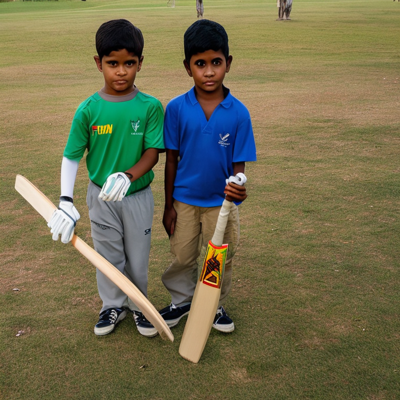

In [ ]:
gen_image('Two boys holding cricket bat',image_gen_model )

  0%|          | 0/35 [00:00<?, ?it/s]

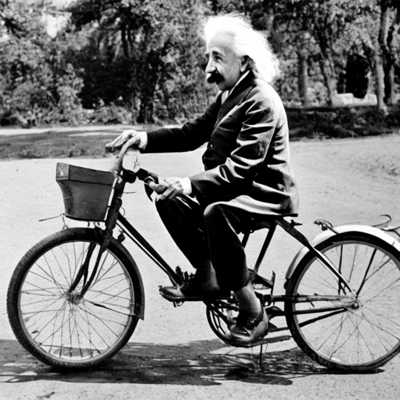

In [ ]:
gen_image('Albert Einstein riding cycle',image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

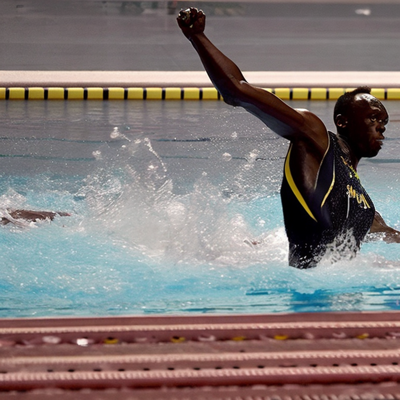

In [ ]:
gen_image('usain bolt swimming downward', image_gen_model)

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pickle

In [ ]:


# Save the 'model' for text generation
with open('text_generation_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# # Save the 'image_gen_model' for image generation
# with open('image_generation_model.pkl', 'wb') as file:
#     pickle.dump(image_gen_model, file)
